# COVID-19 Visualization

This is a personal project for quickly visualize COVID-19 **confirmed cases** and **new cases** of each day, based on data on [Our World in Data on Coronavirus](https://ourworldindata.org/coronavirus).

To find out the situation of each country, simply call **`check_plot(`**`iso_code`**`)`** function and pass in the country code.

In [1]:
# imports

# standard import
import numpy as np
import pandas as pd

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# ssl issue while referencing source URL
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
def check_plot(iso_code):
    # source url
    url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
    # read csv file from url
    covid_df = pd.read_csv(url)
    
    # check select country based on input
    check_df = covid_df[covid_df['iso_code'] == iso_code].sort_values('date')
    
    # create loged number
    check_df["log_total_cases"] = np.log10(check_df.total_cases + 1)
    check_df["log_new_cases"] = np.log10(check_df.new_cases + 1)
    
    # plot
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True, figsize=(16,20))
    
    xticks_dates = [s for i,s in enumerate(list(check_df['date'].unique())) if i % 15 ==0]
    
    ax1.plot(check_df.date, check_df.total_cases)
    ax1.set_title( iso_code + " | Total Cases (cumulative)")
    ax2.plot(check_df.date, check_df.log_total_cases)
    ax2.set_title( iso_code + " | Total Cases (log)")
    ax3.plot(check_df.date, check_df.new_cases)
    ax3.set_title( iso_code + " | New Cases ")
    ax4.plot(check_df.date, check_df.log_new_cases)
    ax4.set_title( iso_code + " | New Cases (log)")
    ax4.set_xticks(xticks_dates)
    return

### Visualization Examples

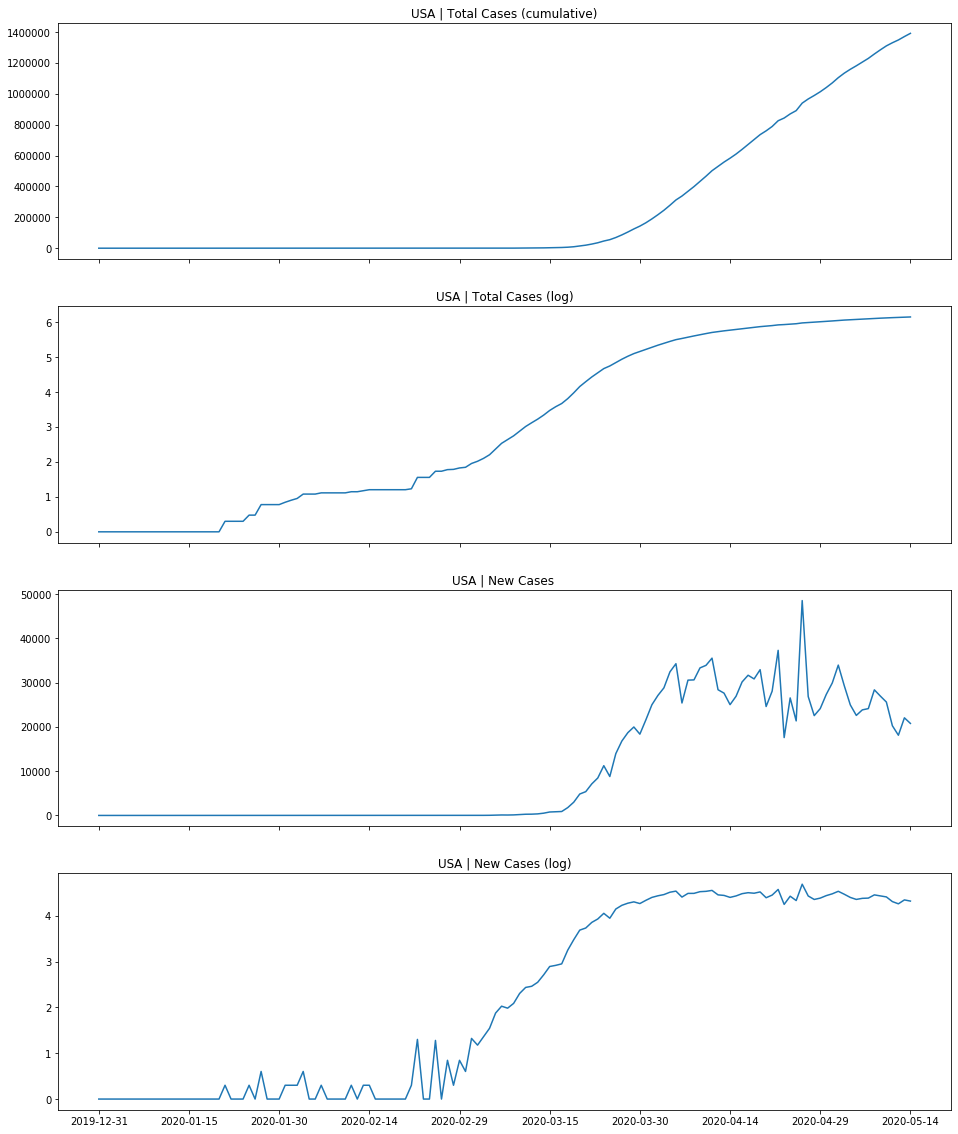

In [3]:
check_plot('USA')

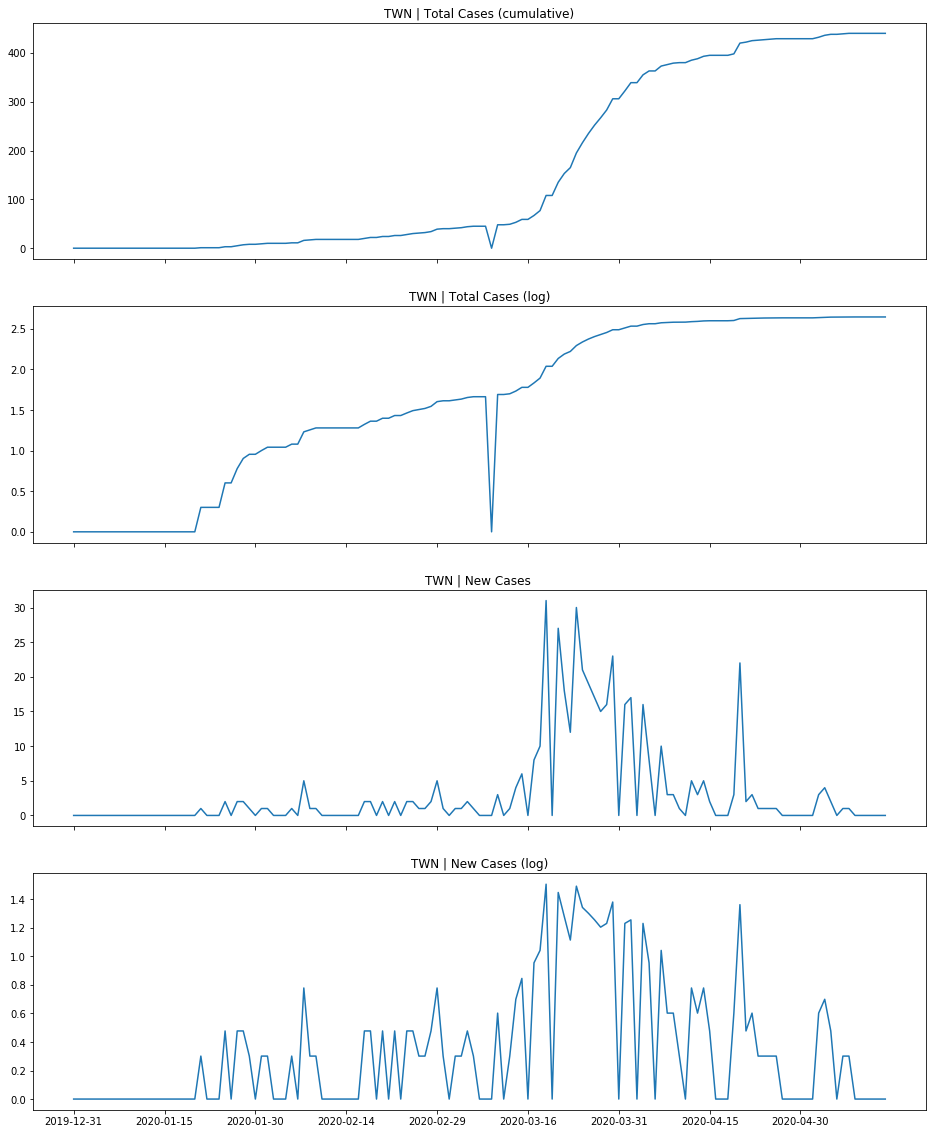

In [4]:
check_plot('TWN')

### Country Names and ISO Code
If you don't know the iso code of the countries that you're looking for, use the following function **`find_iso_code(`**`CountryName`**`)`**

In [5]:
def find_iso_code(CountryName):
    # source url
    url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
    # read csv file from url
    covid_df = pd.read_csv(url)
    return covid_df[covid_df['location'] == CountryName]['iso_code'].iloc[0]

Example 1 - Looking for iso code of **Taiwan**

In [6]:
find_iso_code('Taiwan')

'TWN'

Example 2 - Looking for iso code of **United States**

In [7]:
find_iso_code('United States')

'USA'

## Now, try it!

In [ ]:
check_plot('') # <-- Type in your country's ISO code! (Make sure to put the iso code between '')

In [ ]:
find_iso_code('') # <-- Type in your country! (Put the country name between '', and CAPITALIZE the first letter)